# Hypothesis testing

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# import microsoft.csv, and add a new feature - logreturn
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

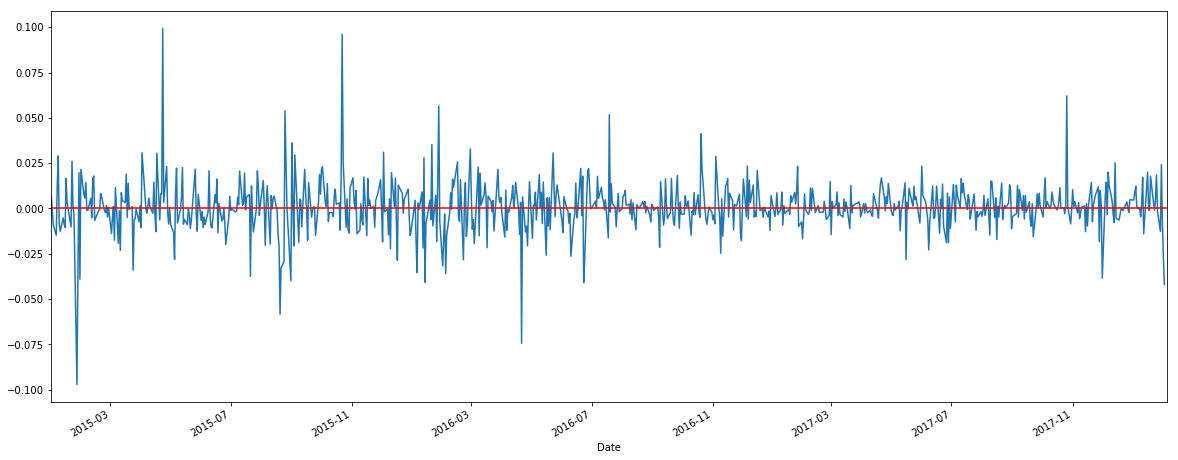

In [7]:
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [8]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


### Step 3: Set desicion criteria

In [9]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.95996398454 1.95996398454


### Step 4:  Make decision - shall we reject H0?

In [10]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## Try one tail test by yourself ! 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [11]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = None
print(zhat)

1.6141477140003675


** Expected output: ** 1.6141477140003675

In [12]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.64485362695


** Expected output: ** 1.64485362695

In [13]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


** Expected output: ** At significant level of 0.05, shall we reject: False

# An alternative method: p-value

In [14]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694997


In [15]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
